In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d gpiosenka/100-bird-species

 99% 1.94G/1.96G [00:16<00:00, 121MB/s]
100% 1.96G/1.96G [00:16<00:00, 127MB/s]


In [1]:
import zipfile

zip_file_path = r'C:\Users\yash mohite\OneDrive\Documents\birds_classifier\test.zip'  # Replace with the path to your ZIP file
destination_folder = r'C:\Users\yash mohite\OneDrive\Documents\birds_classifier\test'   # Replace with your desired destination folder

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img,load_img
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
# prapring data and apply data augementation

BATCH_SIZE = 132
TARGET_SIZE = (224,224)
CLASS_MODE = 'sparse'

train_gen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,

)

test_gen = ImageDataGenerator(
    rescale = 1./255)

validation_gen = ImageDataGenerator(
    rescale = 1./255)

In [ ]:
# now apply generator on directory
train_data = train_gen.flow_from_directory(
    "/content/train",
    target_size = TARGET_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = CLASS_MODE
)

test_data = test_gen.flow_from_directory(
    "/content/test",
    target_size = TARGET_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = CLASS_MODE
)

validation_data = validation_gen.flow_from_directory(
    "/content/valid",
    target_size = TARGET_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = CLASS_MODE
)

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [ ]:
# now create pre-trained Model
resnet_base = ResNet50V2(
    weights='imagenet',
    include_top = False,
    input_shape = (224,224,3)
)

94668760/94668760 [==============================] - 1s 0us/step


In [ ]:
# now check the layers in resnet
def check_layers():
  for layer in resnet_base.layers:
    print(layer.name,layer.trainable)

check_layers()

input_1 True
conv1_pad True
conv1_conv True
pool1_pad True
pool1_pool True
conv2_block1_preact_bn True
conv2_block1_preact_relu True
conv2_block1_1_conv True
conv2_block1_1_bn True
conv2_block1_1_relu True
conv2_block1_2_pad True
conv2_block1_2_conv True
conv2_block1_2_bn True
conv2_block1_2_relu True
conv2_block1_0_conv True
conv2_block1_3_conv True
conv2_block1_out True
conv2_block2_preact_bn True
conv2_block2_preact_relu True
conv2_block2_1_conv True
conv2_block2_1_bn True
conv2_block2_1_relu True
conv2_block2_2_pad True
conv2_block2_2_conv True
conv2_block2_2_bn True
conv2_block2_2_relu True
conv2_block2_3_conv True
conv2_block2_out True
conv2_block3_preact_bn True
conv2_block3_preact_relu True
conv2_block3_1_conv True
conv2_block3_1_bn True
conv2_block3_1_relu True
conv2_block3_2_pad True
conv2_block3_2_conv True
conv2_block3_2_bn True
conv2_block3_2_relu True
max_pooling2d True
conv2_block3_3_conv True
conv2_block3_out True
conv3_block1_preact_bn True
conv3_block1_preact_relu Tru

In [ ]:
# create the function to fine tuening
# set_trainable = False

def fine_tuening(target_block):
  resnet_base.trainable = True
  set_trainable = False

  for layer in resnet_base.layers:
    if layer.name == target_block:
      set_trainable = True

    if set_trainable:
      layer.trainable = True

    else:
      layer.trainable = False

fine_tuening("conv5_block1_preact_bn")

In [ ]:
check_layers()

input_1 False
conv1_pad False
conv1_conv False
pool1_pad False
pool1_pool False
conv2_block1_preact_bn False
conv2_block1_preact_relu False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_pad False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_out False
conv2_block2_preact_bn False
conv2_block2_preact_relu False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_pad False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_out False
conv2_block3_preact_bn False
conv2_block3_preact_relu False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_pad False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
max_pooling2d False
conv2_block3_3_conv False
conv2_block3_out False
conv3_block1_pre

In [ ]:
resnet_base.summary()# get the summary of convo base

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                         

In [ ]:
# now create the dense layer to train the model on convo base

model = Sequential()

#add resnet base
model.add(resnet_base)

# add Flatten layer to convert in to 1D Array
model.add(Flatten())

# now add Dense layer 1 with batchnormalizwtion
model.add(Dense(500,activation="elu",kernel_initializer="he_normal"))
model.add(BatchNormalization())

model.add(Dense(300,activation="elu",kernel_initializer="he_normal"))
model.add(BatchNormalization())

model.add(Dense(100,activation="elu",kernel_initializer="he_normal"))
model.add(BatchNormalization())

model.add(Dense(525,activation="softmax")) #output layer

In [ ]:
model.summary()  #get hole model Summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 500)               50176500  
                                                                 
 batch_normalization (Batch  (None, 500)               2000      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                       

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

In [ ]:
# Now compile The model
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    train_data,
    epochs = 5,
    steps_per_epoch=len(train_data),
    callbacks = [early_stopping],
    validation_data = validation_data
)

Epoch 1/5
642/642 [==============================] - 1147s 2s/step - loss: 2.2605 - accuracy: 0.5763 - val_loss: 0.7272 - val_accuracy: 0.8160
Epoch 2/5
642/642 [==============================] - 1138s 2s/step - loss: 0.6142 - accuracy: 0.8471 - val_loss: 0.4722 - val_accuracy: 0.8716
Epoch 3/5
642/642 [==============================] - 1139s 2s/step - loss: 0.3619 - accuracy: 0.9038 - val_loss: 0.3978 - val_accuracy: 0.8884
Epoch 4/5
642/642 [==============================] - 1139s 2s/step - loss: 0.2576 - accuracy: 0.9291 - val_loss: 0.3977 - val_accuracy: 0.8930
Epoch 5/5
642/642 [==============================] - 1145s 2s/step - loss: 0.1930 - accuracy: 0.9451 - val_loss: 0.3608 - val_accuracy: 0.9086


In [ ]:
model.save("model.h5") # saving model

In [ ]:
pd.DataFrame(history.history)

loss  accuracy  val_loss  val_accuracy
0  2.260457  0.576251  0.727177      0.816000
1  0.614165  0.847073  0.472225      0.871619
2  0.361904  0.903763  0.397839      0.888381
3  0.257637  0.929143  0.397701      0.892952
4  0.192976  0.945129  0.360837      0.908571

<Axes: >

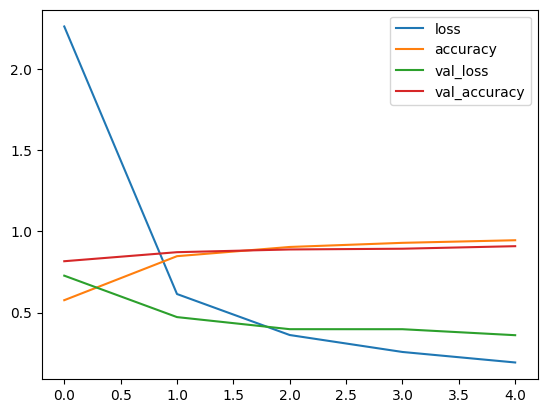

In [ ]:
pd.DataFrame(history.history).plot()

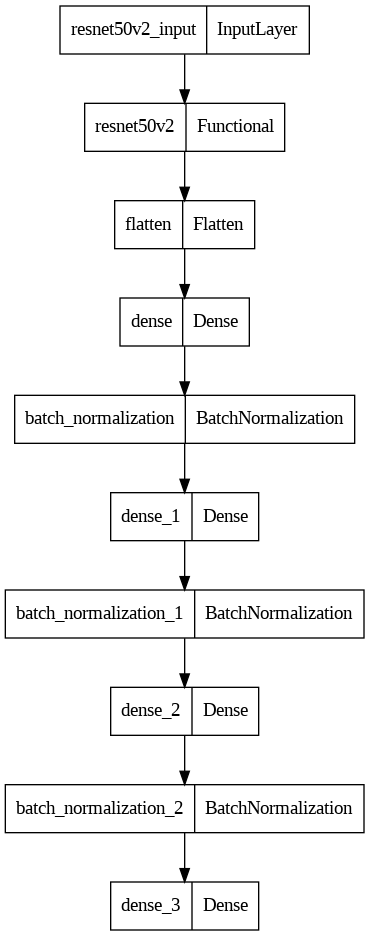

In [ ]:
from tensorflow.keras.utils import plot_model  #plot aur model and see
plot_model(model)

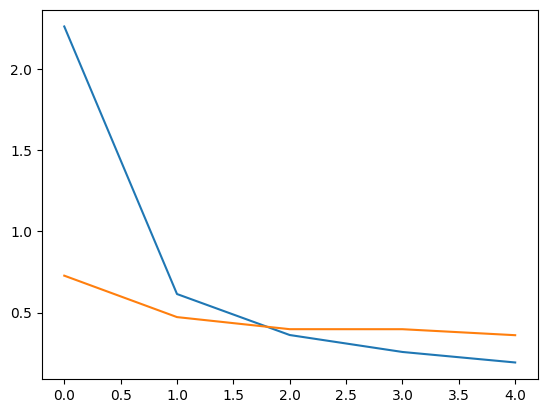

In [ ]:
# plot and see the accuracy and loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

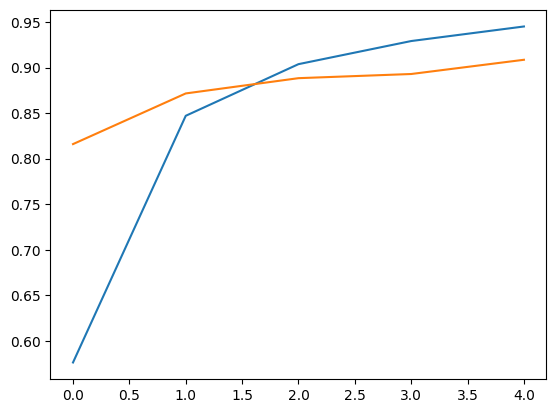

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [ ]:
# now evaluate model using test data
result = model.evaluate(test_data)
print(f"Test Loss: {result[0]}")
print(f"Test Accuracy: {result[1]}")

20/20 [==============================] - 8s 390ms/step - loss: 0.2576 - accuracy: 0.9307
Test Loss: 0.2575837969779968
Test Accuracy: 0.9306666851043701


1/1 [==============================] - 1s 1s/step


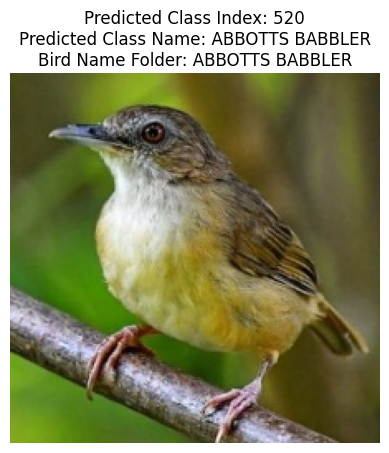

1/1 [==============================] - 0s 121ms/step


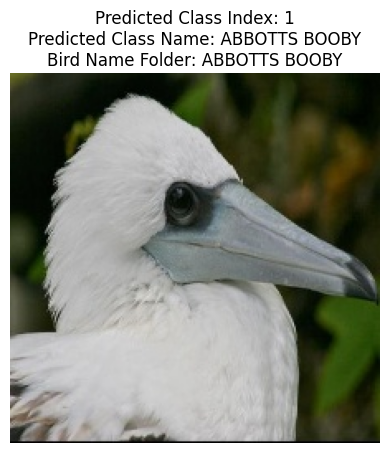

1/1 [==============================] - 0s 114ms/step


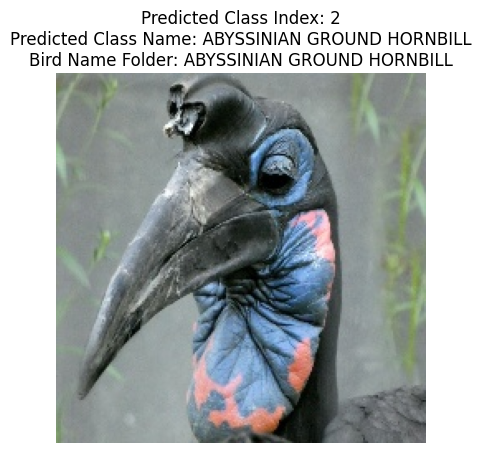

1/1 [==============================] - 0s 127ms/step


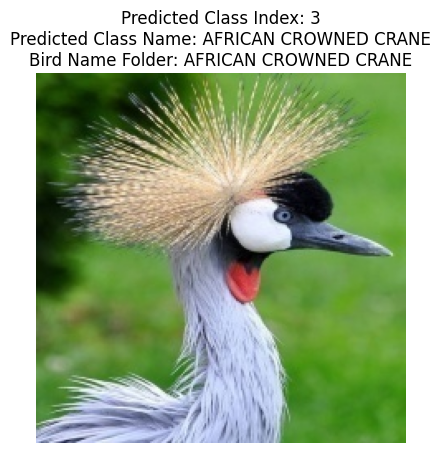

1/1 [==============================] - 0s 202ms/step


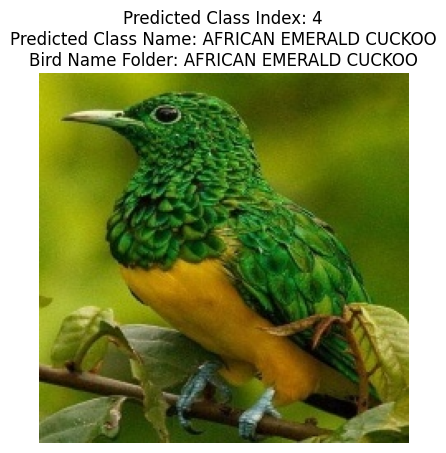

1/1 [==============================] - 0s 150ms/step


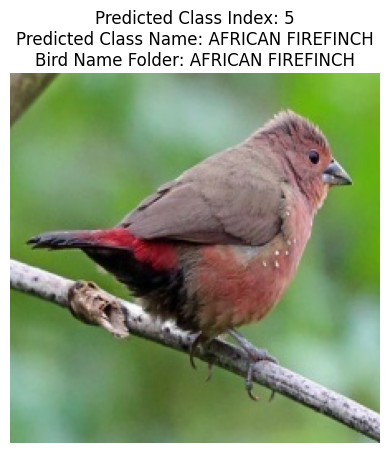

1/1 [==============================] - 0s 134ms/step


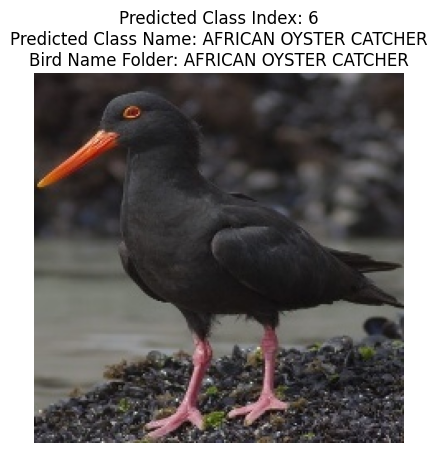

1/1 [==============================] - 0s 150ms/step


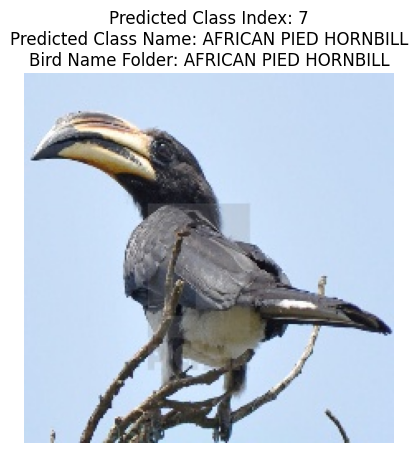

1/1 [==============================] - 0s 120ms/step


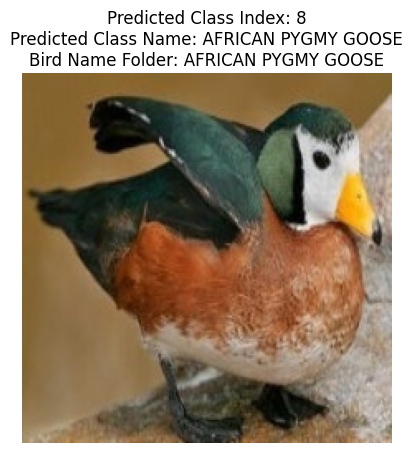

1/1 [==============================] - 0s 132ms/step


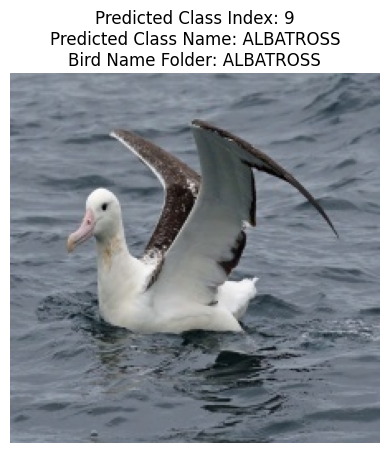

1/1 [==============================] - 0s 141ms/step


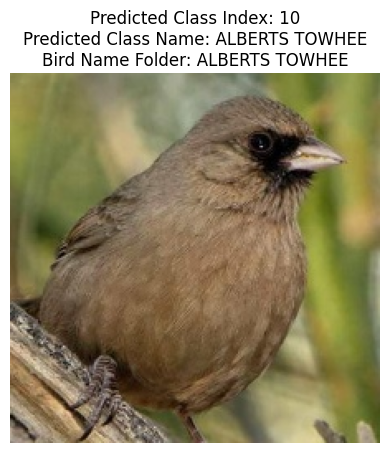

1/1 [==============================] - 0s 237ms/step


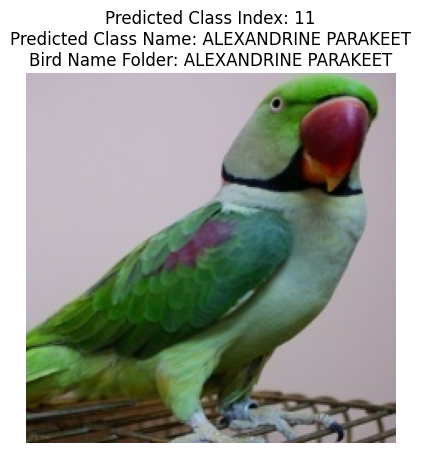

1/1 [==============================] - 0s 136ms/step


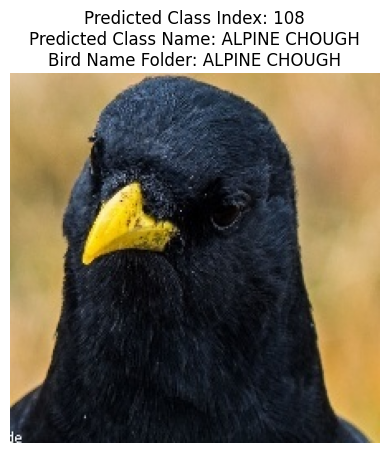

1/1 [==============================] - 0s 132ms/step


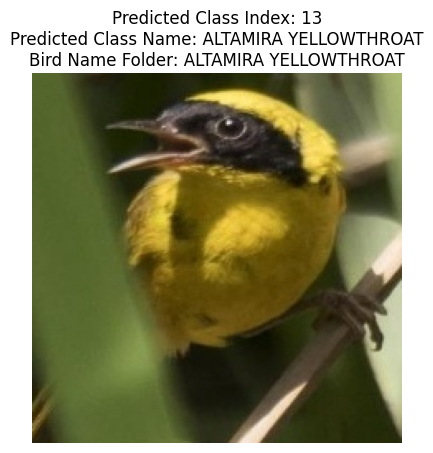

1/1 [==============================] - 0s 190ms/step


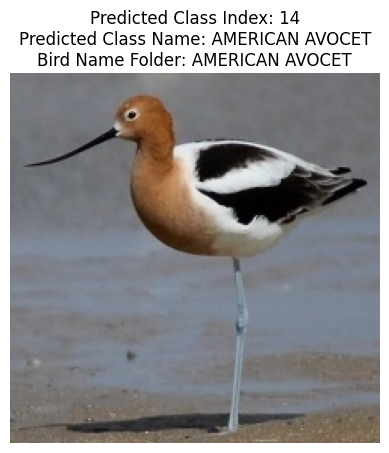

1/1 [==============================] - 0s 149ms/step


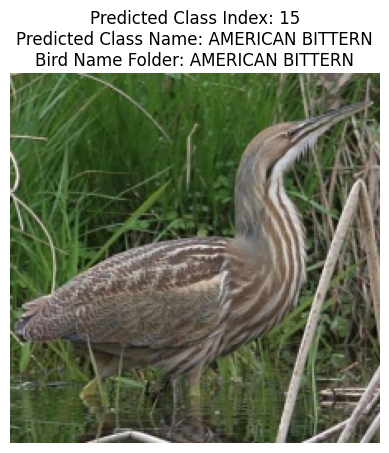

1/1 [==============================] - 0s 127ms/step


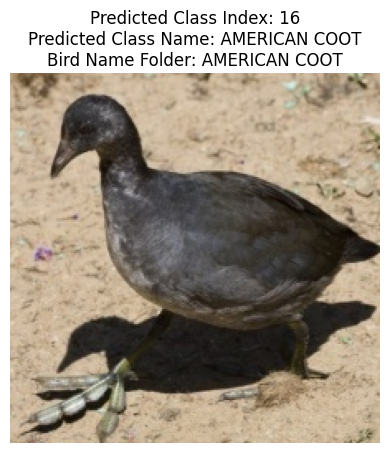

1/1 [==============================] - 0s 179ms/step


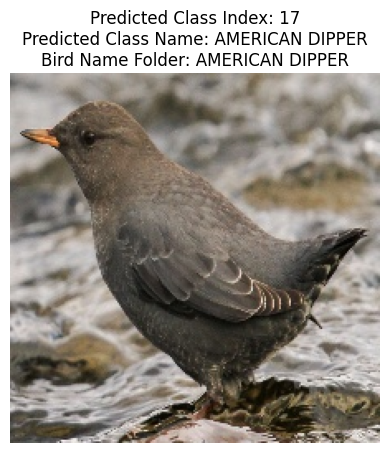

1/1 [==============================] - 0s 200ms/step


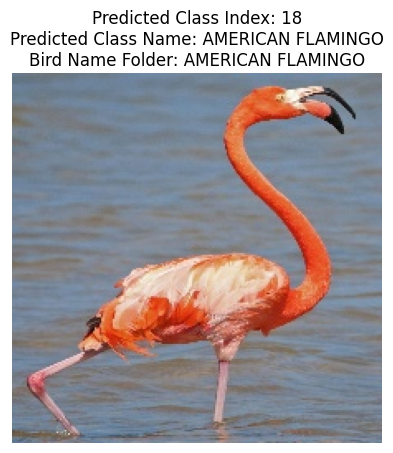

1/1 [==============================] - 0s 152ms/step


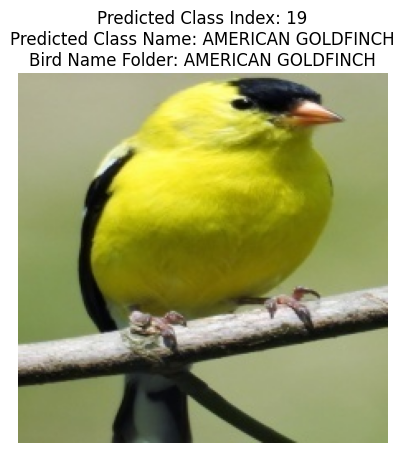

1/1 [==============================] - 0s 154ms/step


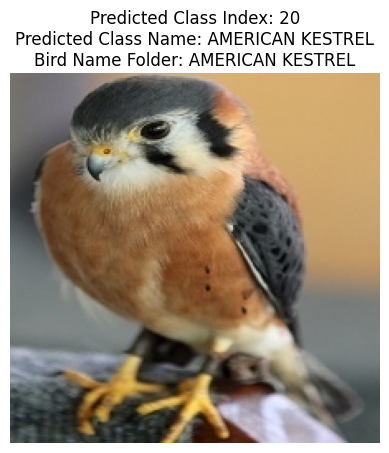

1/1 [==============================] - 0s 182ms/step


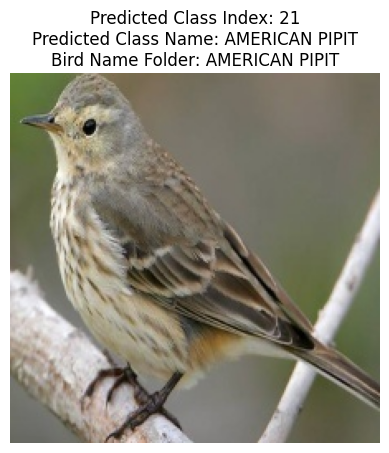

1/1 [==============================] - 0s 188ms/step


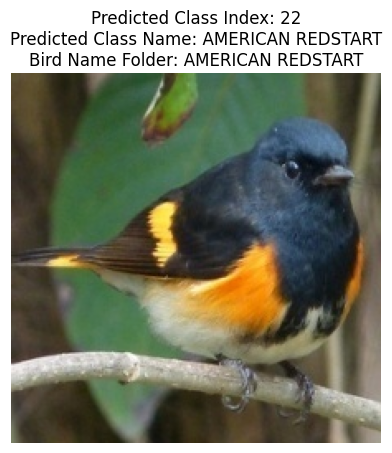

1/1 [==============================] - 0s 225ms/step


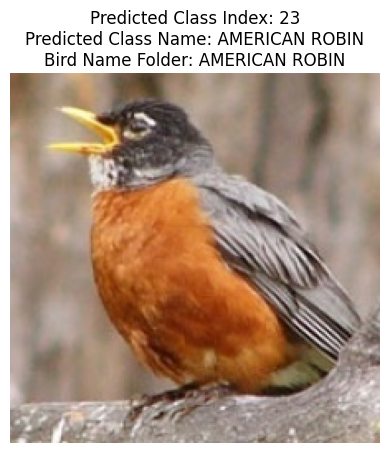

1/1 [==============================] - 0s 184ms/step


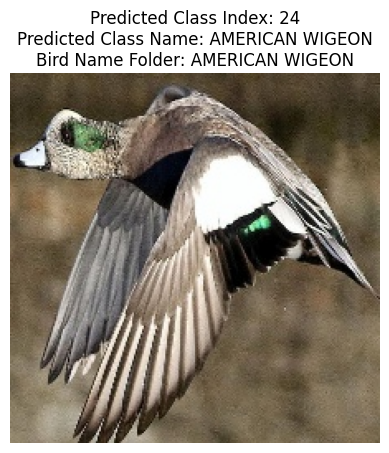

1/1 [==============================] - 0s 152ms/step


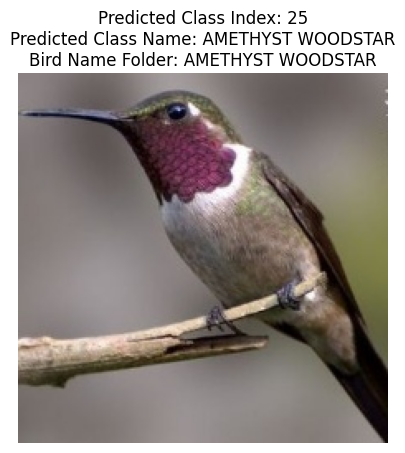

1/1 [==============================] - 0s 150ms/step


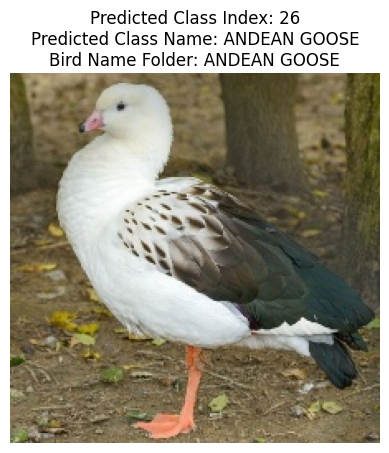

1/1 [==============================] - 0s 162ms/step


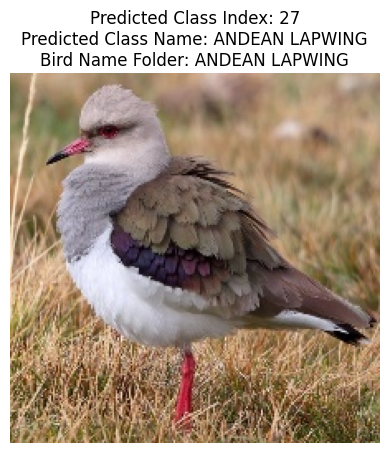

1/1 [==============================] - 0s 170ms/step


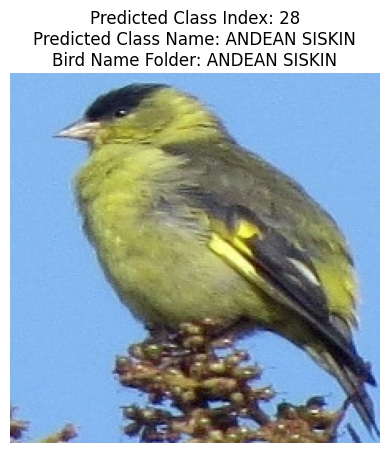

1/1 [==============================] - 0s 154ms/step


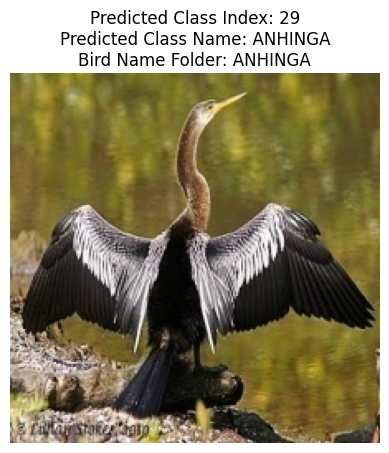

In [3]:
# Set a random seed to ensure different random selections each time
np.random.seed()

# Path to your test data directory
testing_directory = 'C:\\Users\\yash mohite\\OneDrive\\Documents\\birds_classifier\\test'

# Load your trained model
model = tf.keras.models.load_model('C:\\Users\\yash mohite\\OneDrive\\Documents\\birds_classifier\\model.h5')

# List all subdirectories (bird name folders) in the testing directory
bird_name_folders = [folder for folder in os.listdir(testing_directory) if os.path.isdir(os.path.join(testing_directory, folder))]

# Initialize a counter for the number of displayed images
displayed_images = 0

# Loop through bird name folders and select 1 random image from each
for bird_name_folder in bird_name_folders:
    # Check if the maximum number of displayed images has been reached
    if displayed_images >= 30:
        break

    # Construct the full path to the current bird name folder
    bird_folder_path = os.path.join(testing_directory, bird_name_folder)

    # List all image files in the current bird name folder
    image_files = [f for f in os.listdir(bird_folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Check if there are any images in the folder
    if len(image_files) > 0:
        # Set a new random seed for each folder to ensure different image selection
        np.random.seed()

        # Select 1 random image for testing from the current folder
        random_image_file = np.random.choice(image_files, 1)[0]
        image_path = os.path.join(bird_folder_path, random_image_file)

        # Load and preprocess the image
        img = image.load_img(image_path, target_size=(224, 224))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = tf.keras.applications.mobilenet_v2.preprocess_input(img)

        # Make a prediction
        prediction = model.predict(img)

        # Get the predicted class index
        predicted_class_index = np.argmax(prediction[0])

        # Get the predicted class name directly from the folder name
        predicted_class_name = bird_name_folder

        # Display the image and its label
        plt.imshow(plt.imread(image_path))
        plt.title(f"Predicted Class Index: {predicted_class_index}\nPredicted Class Name: {predicted_class_name}\nBird Name Folder: {bird_name_folder}")
        plt.axis('off')
        plt.show()

        # Increment the displayed images counter
        displayed_images += 1